In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ParisHousingClass.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Luxury
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [3]:
df.shape

(10000, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [6]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


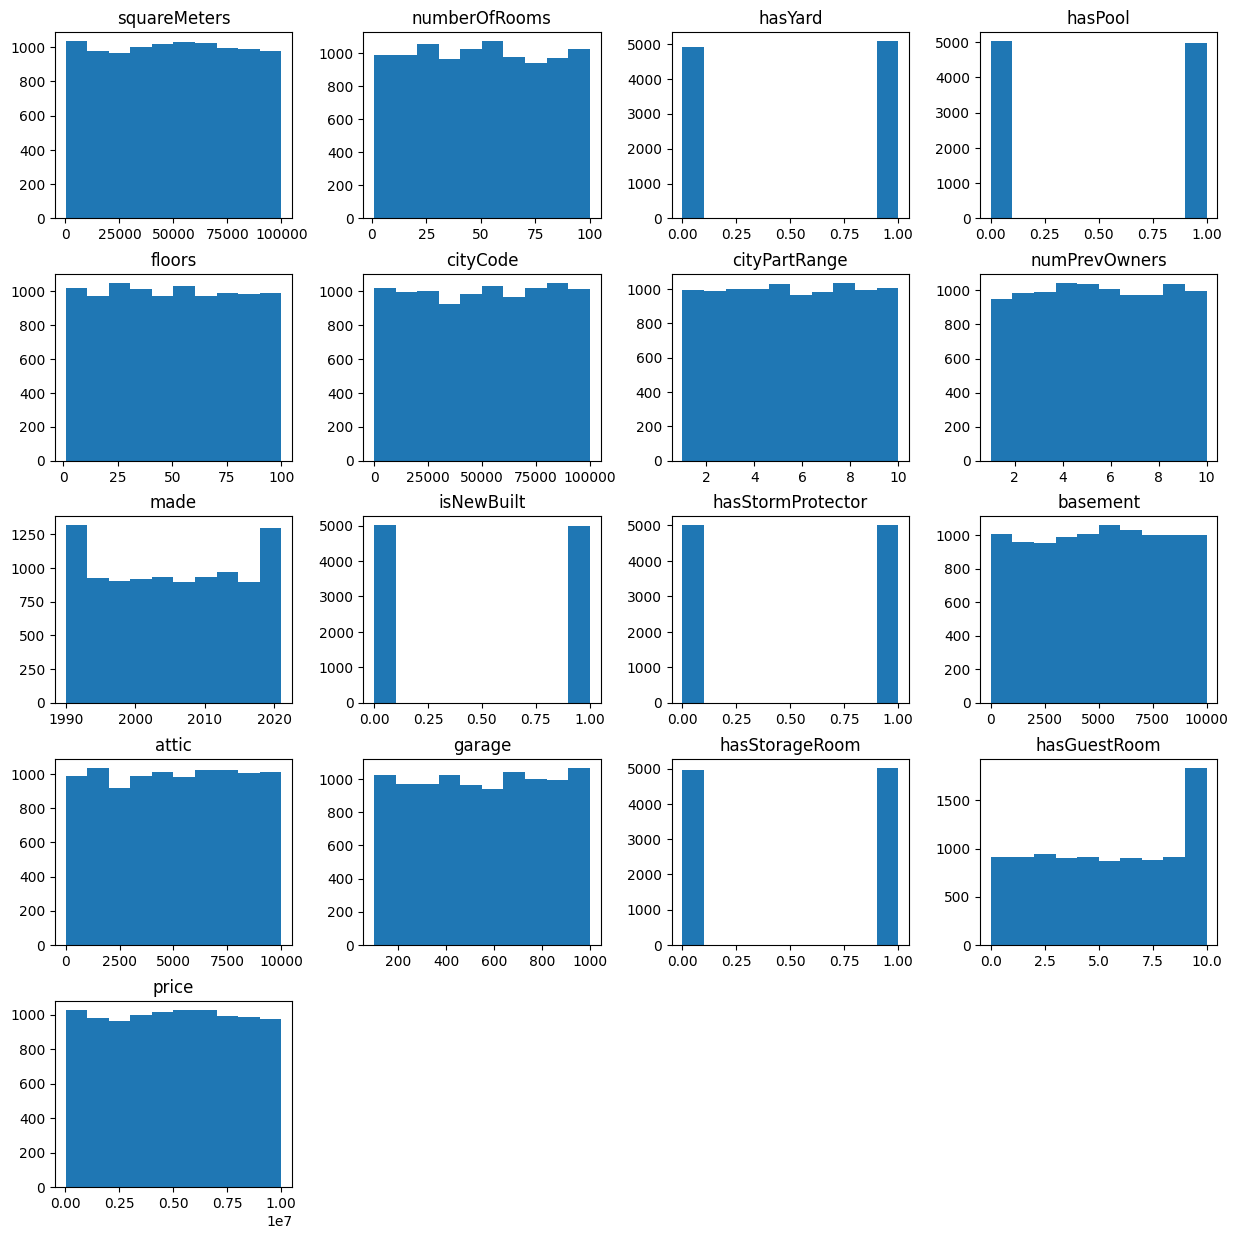

In [7]:
df.hist(figsize=(15, 15), grid=False)
plt.show()

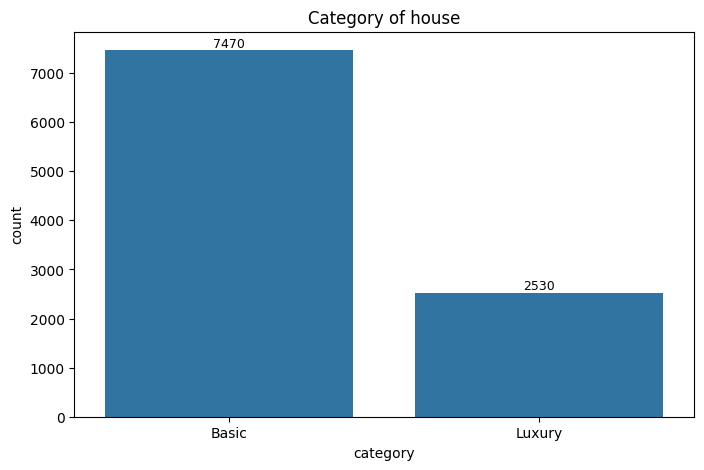

In [8]:
plt.figure(figsize = (8, 5))
ax = sns.countplot(x=df['category'])
ax.bar_label(ax.containers[0], fontsize=9)
plt.title('Category of house')
plt.show()

# Regression

In [9]:
df_reg = df.drop(['category'], axis=1)
df_reg.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


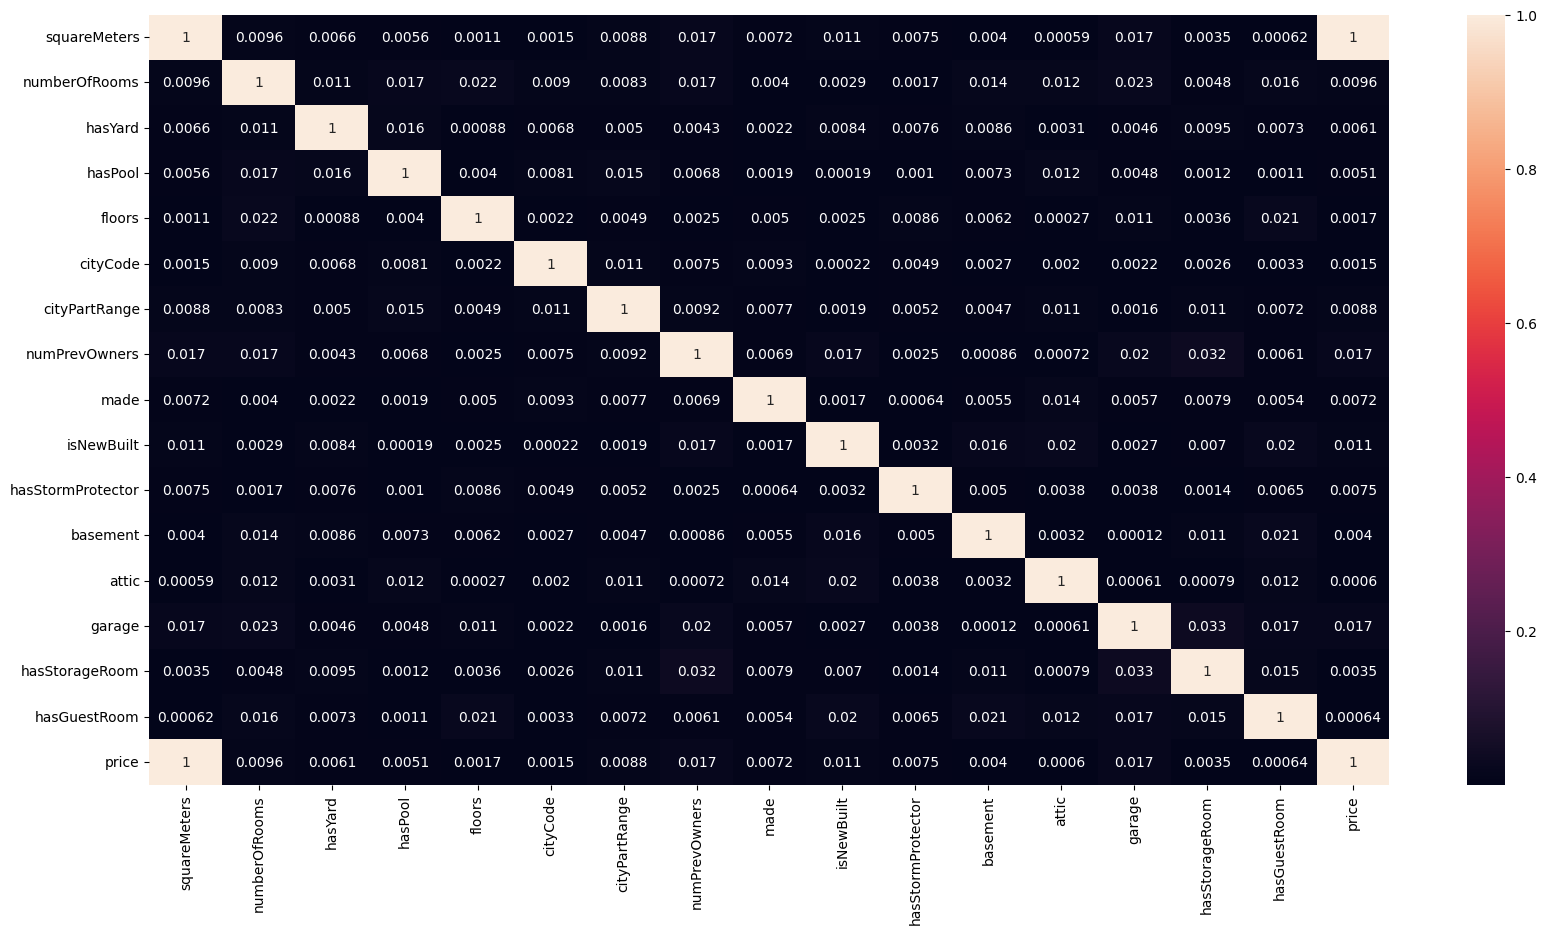

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_reg.corr().abs(), annot=True)
plt.show()

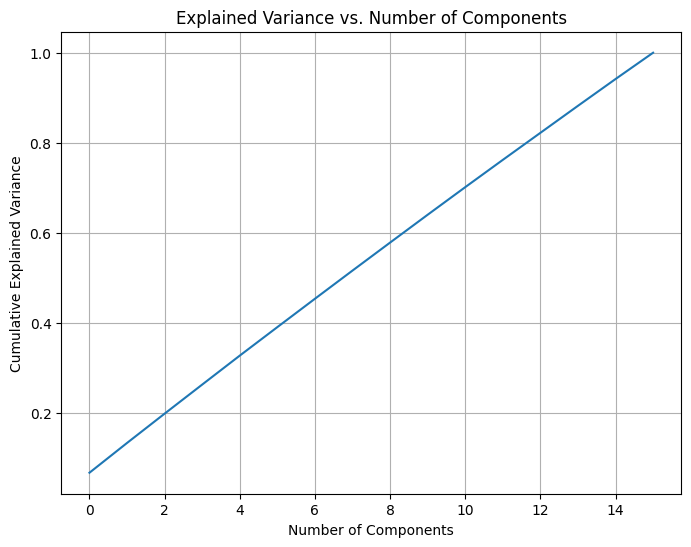

In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_reg)
df_scaled = pd.DataFrame(df_scaled, columns=df_reg.columns)

X = df_scaled.drop(['price'], axis=1)
y = df_scaled['price']

# Применение PCA ко всему датасету
pca = PCA().fit(X)

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [12]:
X = df_reg.drop(['price'], axis=1)
y = df_reg['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(8000, 16) (2000, 16) (8000,) (2000,)


In [13]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Linear Regression MAE: {mean_absolute_error(y_test, y_pred)}\n')


# PCA
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
print(f'PCA-based Linear Regression MSE: {mean_squared_error(y_test, y_pred_pca)}')
print(f'PCA-based Linear Regression MAE: {mean_absolute_error(y_test, y_pred_pca)}')

Linear Regression MSE: 3761170.8781917933
Linear Regression MAE: 1521.6848741964245

PCA-based Linear Regression MSE: 1276837356358.3745
PCA-based Linear Regression MAE: 909699.2819804361


При применении PCA ошибки увеличились.

In [14]:
X_train

array([[ 0.63264538, -1.71962602,  0.98289625, ...,  0.82987356,
        -1.00175153,  1.25826486],
       [ 1.04273058,  0.89172371,  0.98289625, ..., -0.17164995,
         0.99825153,  0.31131106],
       [ 0.847001  , -0.29208817,  0.98289625, ..., -1.70069346,
        -1.00175153, -1.26694527],
       ...,
       [ 0.51759399, -1.33662806,  0.98289625, ..., -0.76415431,
         0.99825153,  0.9426136 ],
       [ 0.29640535,  1.20508567, -1.01740138, ...,  1.66320227,
        -1.00175153, -1.26694527],
       [ 0.92382911, -1.51071805,  0.98289625, ..., -1.13494736,
        -1.00175153, -0.95129401]])

In [15]:
y_train

7496    6812854.0
7694    7996012.6
9248    7425893.7
2470    1333885.4
4392    4191936.6
          ...    
9372    5868912.1
7291    7252778.2
1344    6472400.1
7293    5836642.2
1289    7654143.9
Name: price, Length: 8000, dtype: float64

In [16]:
# LDA
lda = LDA(n_components=14)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

ValueError: Unknown label type: (array([6812854. , 7996012.6, 7425893.7, ..., 6472400.1, 5836642.2,
       7654143.9]),)

# Classification

In [17]:
df_cl = df.copy()
df_cl['category'] = df_cl['category'].replace({'Basic':0, 'Luxury':1})
df_cl.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,1
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1


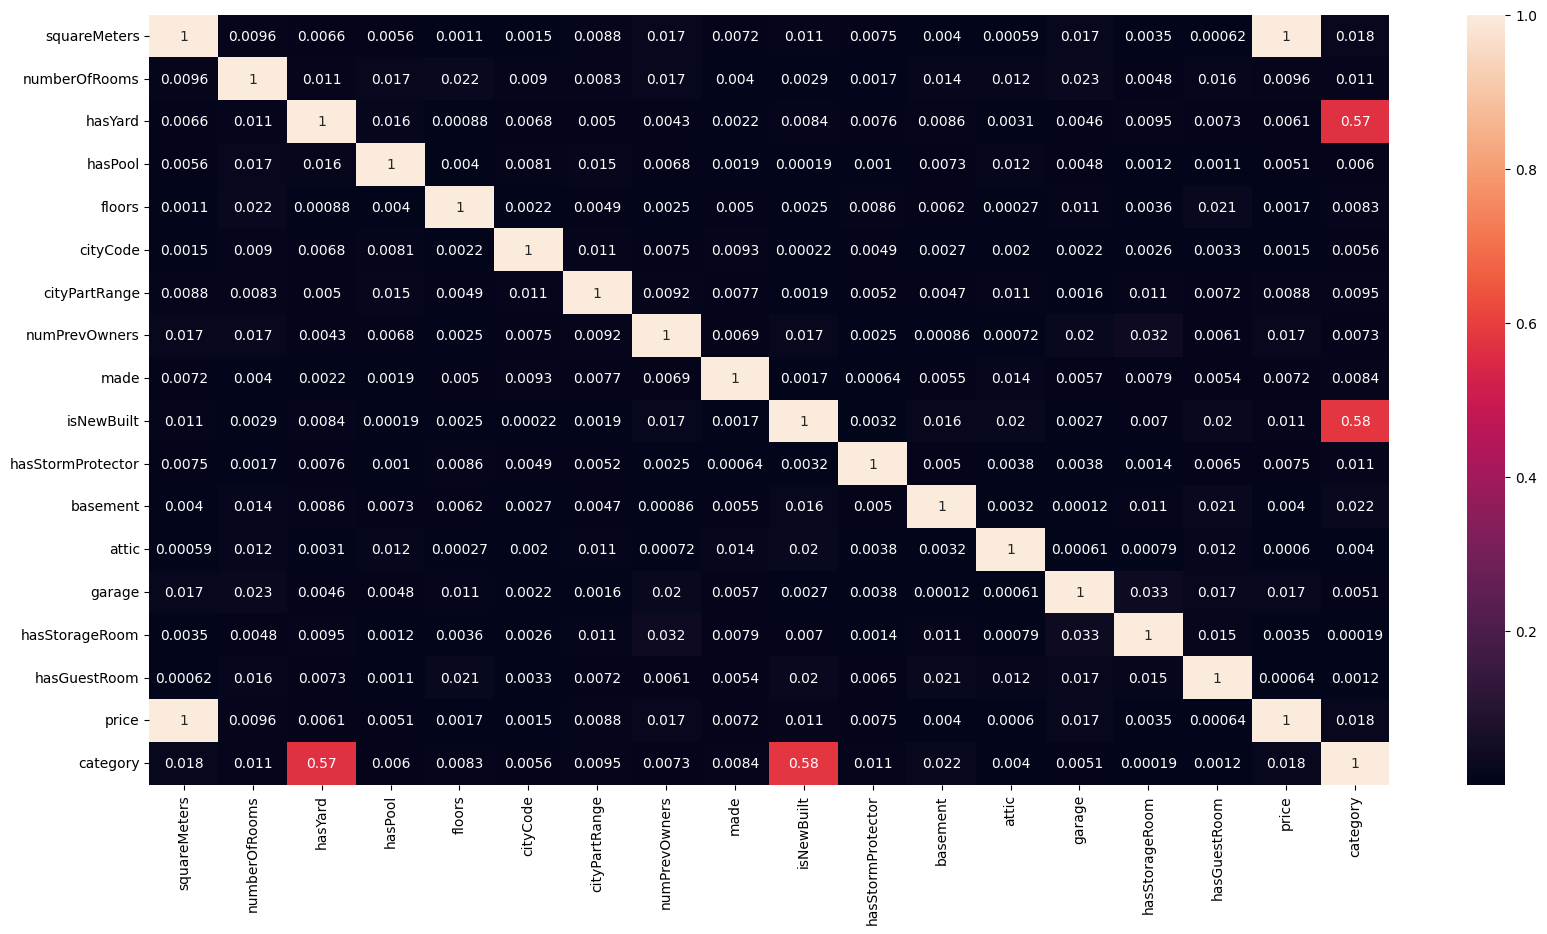

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_cl.corr().abs(), annot=True)
plt.show()

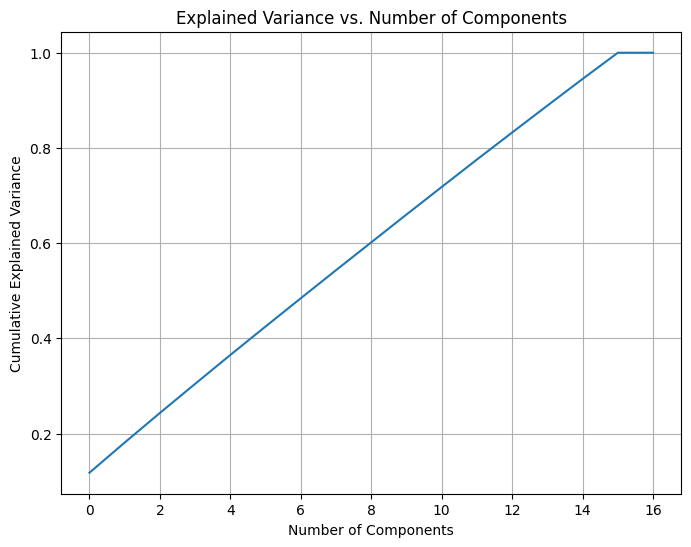

In [19]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cl)
df_scaled = pd.DataFrame(df_scaled, columns=df_cl.columns)

X = df_scaled.drop(['category'], axis=1)
y = df_scaled['category']

# Применение PCA ко всему датасету
pca = PCA().fit(X)

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [20]:
X = df_cl.drop(['category'], axis=1)
y = df_cl['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(8000, 17) (2000, 17) (8000,) (2000,)


In [21]:
# LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}')


# LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_lda, y_train)
y_pred_lda = lr.predict(X_test_lda)
print(f'LDA-based Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lda)}')


# PCA
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
print(f'PCA-based Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_pca)}')

Logistic Regression Accuracy: 0.9975
LDA-based Logistic Regression Accuracy: 0.9975
PCA-based Logistic Regression Accuracy: 0.9125


LDA и Логистическая регрессия показали одинаковые результаты, PCA ухудшил результат.

# Clustering

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cl)
df_scaled = pd.DataFrame(df_scaled, columns=df_cl.columns)

X = df_scaled.drop(['category'], axis=1)
y = df_cl['category']

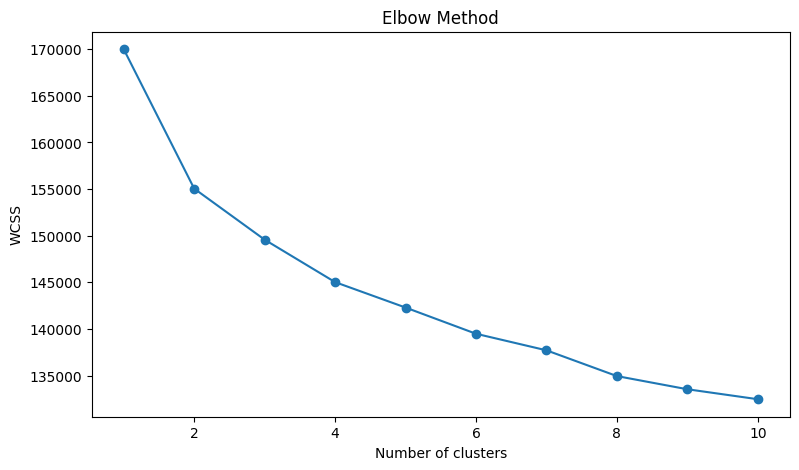

In [33]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(9,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

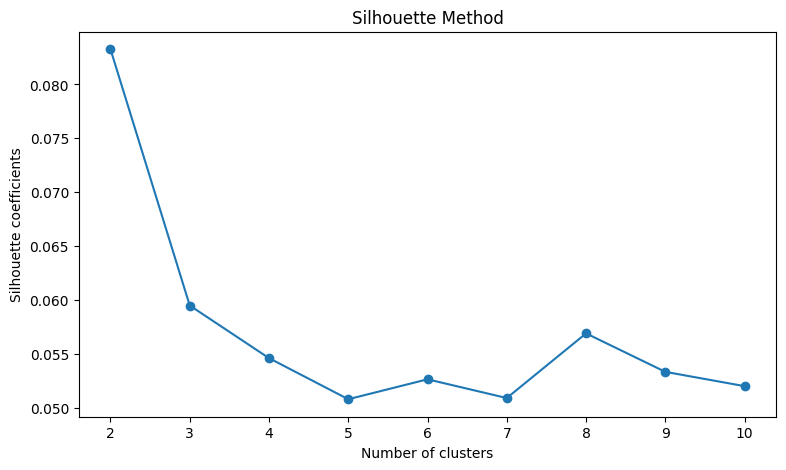

In [34]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.figure(figsize=(9,5))
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.title('Silhouette Method')    # Метод силуэтного коэффициента
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficients')
plt.show()

Проведем расчет по 8 кластерам

In [25]:
# KMeans
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans_labels = kmeans.fit_predict(X)
print(f'K-means Silhouette Score: {silhouette_score(X, kmeans_labels)}')

# LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans_labels_lda = kmeans.fit_predict(X_lda)
print(f'LDA-based K-means Silhouette Score: {silhouette_score(X, kmeans_labels_lda)}')

# PCA
pca = PCA(n_components=14)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans_labels_pca = kmeans.fit_predict(X_pca)
print(f'PCA-based K-means Silhouette Score: {silhouette_score(X, kmeans_labels_pca)}')

K-means Silhouette Score: 0.05692436952069313
LDA-based K-means Silhouette Score: 0.013107154264899725
PCA-based K-means Silhouette Score: 0.049327924690550085


PCA и LDA ухудшили оценку (LDA справился хуже).

# T-SNE clustering

In [26]:
from sklearn.manifold import TSNE

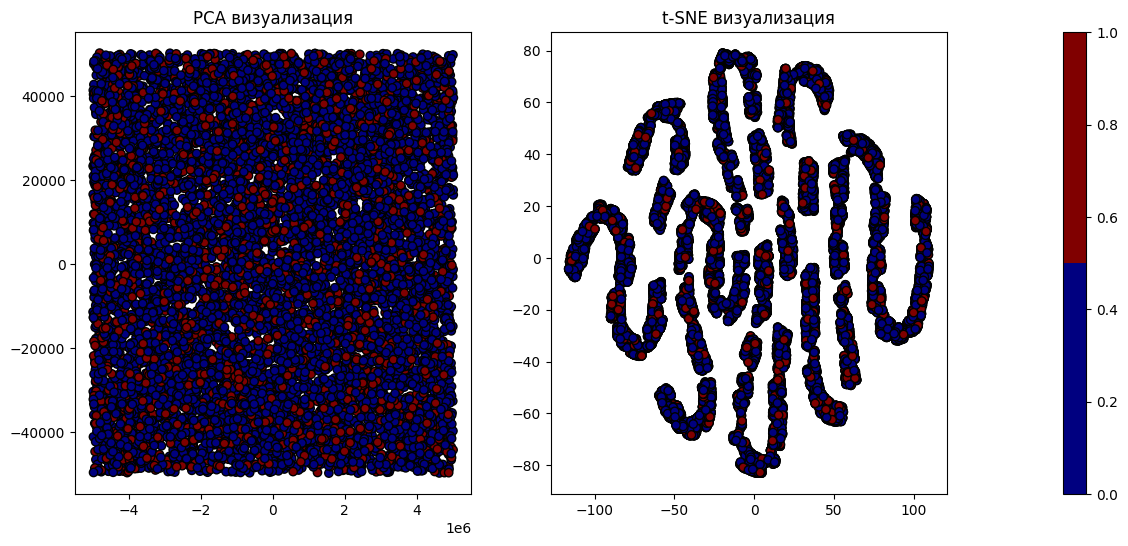

In [27]:
X = df_cl.drop(['category'], axis=1)
y = df_cl['category']

# PCA
X_pca = PCA(n_components=2).fit_transform(X)

# t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

# Визуализация результатов
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap('jet', 2))
axes[0].set_title('PCA визуализация')

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap('jet', 2))
axes[1].set_title('t-SNE визуализация')

plt.colorbar(mappable=axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap('jet', 2)), ax=axes, orientation='vertical', pad=0.1)
plt.show()

In [28]:
# KMeans
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans_labels = kmeans.fit_predict(X)
print(f'K-means Silhouette Score: {silhouette_score(X, kmeans_labels)}')

# t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans_labels = kmeans.fit_predict(X_tsne)
print(f'T-SNE K-means Silhouette Score: {silhouette_score(X, kmeans_labels)}')

K-means Silhouette Score: 0.5436381823346362
T-SNE K-means Silhouette Score: 0.1739873290688802
